### K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm generally used for classification but can also be used for regression tasks.

It works by finding the "k" closest data points (neighbors) to a given input and makes a predictions based on the majority class (for classification) or the average value (for regression).

K-Nearest Neighbors is also called a `lazy learner algorithm` because it does not learn from the training set immediately instead it stores the entire dataset and performs computations only at the time of classification.

For example, consider the following table of data points containing two features:

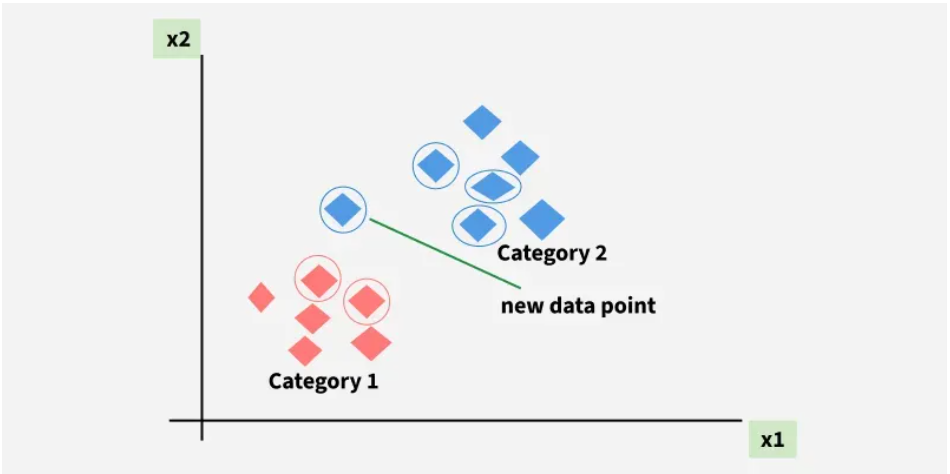

- The red diamonds represent Category 1 and the blue squares represent Category 2.
- The new data point checks its closest neighbors (circled points).
- Since the majority of its closest neighbors are blue squares (Category 2) KNN predicts the new data point belongs to Category 2.

KNN works by using proximity and majority voting to make predictions.

#### What is 'K' in K Nearest Neighbour?

In the k-Nearest Neighbours algorithm `k` is just a number that tells the algorithm how many nearby points or neighbors to look at when it makes a decision.

Example: Imagine you're deciding which fruit it is based on its shape and size. You compare it to fruits you already know.

- If k = 3, the algorithm looks at the 3 closest fruits to the new one.
- If 2 of those 3 fruits are apples and 1 is a banana, the algorithm says the new fruit is an apple because most of its neighbors are apples.

#### How to choose the value of k for KNN Algorithm?

- The value of `k` in KNN decides how many neighbors the algorithm looks at when making a prediction.
- Choosing the right k is important for good results.
- If the data has lots of noise or outliers, using a larger k can make the predictions more stable.
- But if k is too large the model may become too simple and miss important patterns and this is called underfitting.
- So k should be picked carefully based on the data.

#### Statistical Methods for Selecting k

a) Cross-Validation: 
- Split your training data into folds (e.g., 5-fold CV).
- Try multiple k values (e.g., 1, 3, 5, …, 20).
- Choose the k with highest average validation accuracy.

b) Elbow Method
- Plot a graph showing the error rate or accuracy for different k values.(k values vs validation error.)
- As k increases the error usually drops at first. 
- But after a certain point error stops decreasing quickly. 
- The point where the curve changes direction and looks like an "elbow" is usually the best choice for k.
- Look for the “elbow point” where increasing k doesn’t significantly reduce error.
- This balances bias and variance.

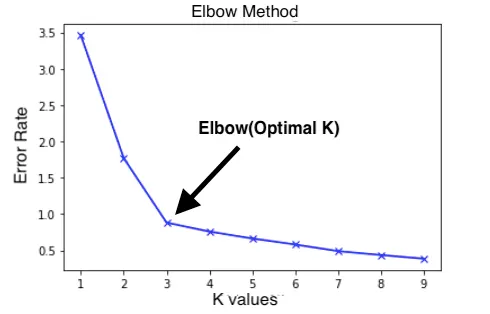

The steps for an elbow method are stated below:

- We choose a K in a range(say from 1 to 10)
- For every K value in this range, we fit the KNN model on the training set and get the result/error on the test set.
- This “result/error” can be anything — accuracy score, recall-score, MAE, RMSE, etc. depending on the problem statement.
- The result/error is then plotted, with K on the x-axis.
- The K, after which the error/result becomes constant, or decreases barely is selected.
- The point where this happens is called the elbow point because it forms an elbow like shape. And we choose the K at this elbow.

c) Odd Values for k: 

- Selecting an odd numbered K value is preferred. Because, it is easier to find the mode and the median of the data with odd numbers.
- This helps avoid ties when deciding which class is the most common among the neighbors.

#### Distance Metrics Used in KNN Algorithm
KNN uses distance metrics to identify nearest neighbor, these neighbors are used for classification and regression task. 

To identify nearest neighbor we use below distance metrics:

1. Euclidean Distance

- Measures the straight-line distance between two points. 
- You can think of it like the shortest path you would walk if you were to go directly from one point to another.

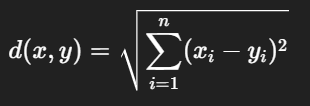



- Best for continuous, normalized data.

2. Manhattan Distance

- Measures distance along axes (like moving on a grid in a city).
- It’s also called "taxicab distance" because a taxi can only drive along the grid-like streets of a city.

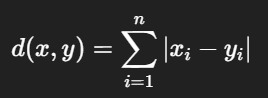

- Good when features are not continuous (e.g., counts).
- More robust to outliers than Euclidean.

3. Minkowski Distance

includes both Euclidean and Manhattan distances as special cases.

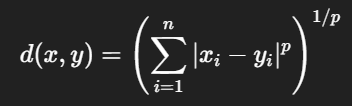

From the formula above: 
- when p=2, it becomes the same as the Euclidean distance formula
- when p=1, it turns into the Manhattan distance formula. 

You can tune p as a hyperparameter.

#### How k-NN Works

Thе K-Nearest Neighbors (KNN) algorithm operates on the principle of similarity where it predicts the label or value of a new data point by considering the labels or values of its K nearest neighbors in the training dataset.

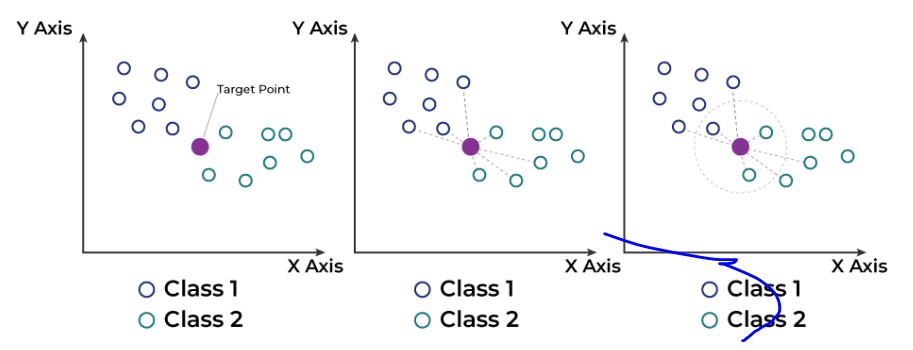

#### Step 1: Choose k
- Pick the number of neighbors (k) to look at.
- Example: k = 3 means we’ll look at the 3 closest points.

#### Step 2: Calculating distance
- For a new sample, calculate the distance to every training point.
- Common choices:
    - Euclidean distance (straight-line distance)
    - Manhattan distance
    - Minkowski distance

#### Step 3: Find the Nearest Neighbors
- Select the k training samples with the smallest distances.

#### Step 4: Make Prediction
- Classification:
    - Take a majority vote of the neighbors’ labels.
    - Example: 2 "Yes" vs 1 "No" → predict "Yes".
- Regression:
    - Take the average of the neighbors’ values.


Choice of k matters:

- Small k → sensitive to noise (overfitting).
- Large k → smoother decision boundary, but may underfit.

### Implementation of KNN Algorithm in Python

#### KNN as Classifier

In [14]:
# importing libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Generating and Visualizing the 2D Data

- The make_moons() function generates a 2D dataset that forms two interleaving half circles.
- This kind of data is non-linearly separable and perfect for showing how k-NN handles such cases.

In [35]:
from sklearn.datasets import make_moons

In [36]:
# Create synthetic 2D data
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

In [37]:
# Create a DataFrame for plotting
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df['Target'] = y

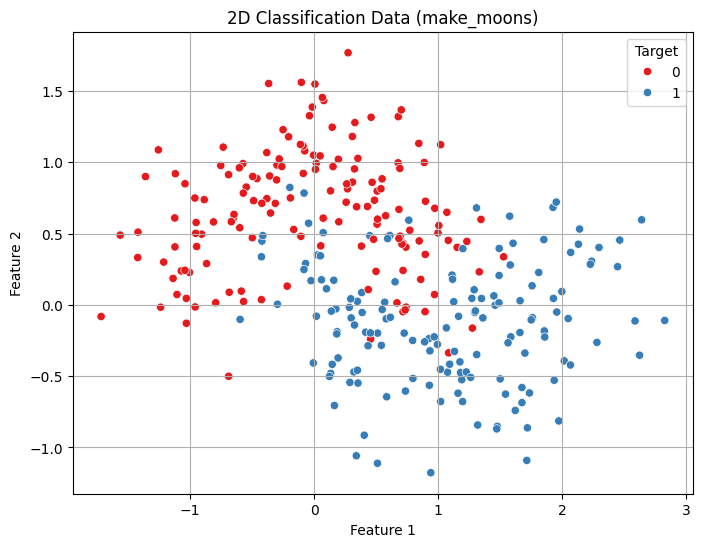

In [38]:
# Visualize the 2D data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue="Target", palette="Set1")
plt.title("2D Classification Data (make_moons)")
plt.grid(True)
plt.show()

### Train-Test Split and Normalization

In [39]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

### Fit the k-NN Model and Evaluate

In [41]:
# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print(f"Test Accuracy (k=5): {accuracy_score(y_test, y_pred):.2f}")

Test Accuracy (k=5): 0.87


### Cross-Validation to Choose Best k

- A smaller k value makes the model sensitive to noise, leading to overfitting (complex models).
- A larger k value results in smoother boundaries, reducing model complexity but possibly underfitting.

- It tests values of k from 1 to 20.
- For each k, a new k-NN model is trained and validated using cross_val_score which automatically splits the dataset into 5 folds, trains on 4 and evaluates on 1, cycling through all folds.
- The mean accuracy of each fold is stored in cv_scores.

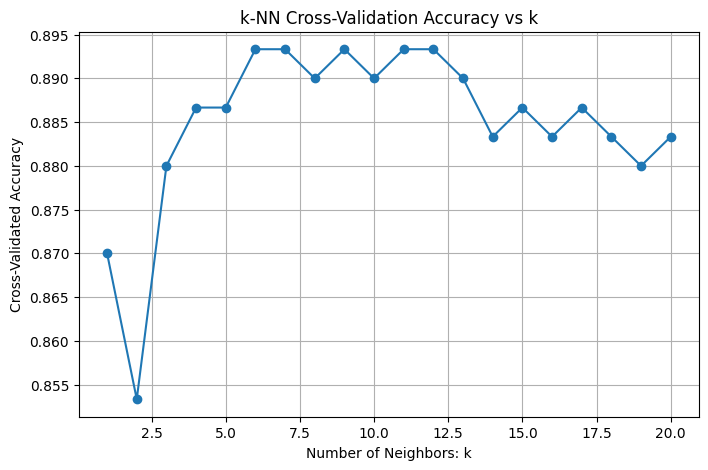

Best k from cross-validation: 6


In [42]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of k values to try
k_range = range(1, 21)
cv_scores = []

# Evaluate each k using 5-fold cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title("k-NN Cross-Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

#### Training with Best k
- The model is trained on the training set with the optimized k (Here k = 6).
- The trained model then predicts labels for the unseen test set to evaluate its real-world performance.

In [43]:
# Train final model with best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict on test data
y_pred = best_knn.predict(X_test)

### Evaluate Using More Metrics

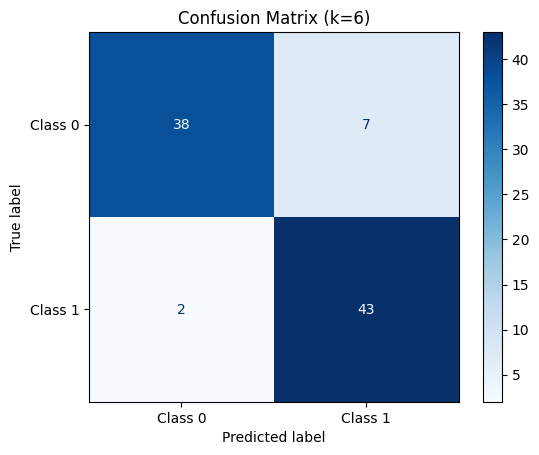

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.84      0.89        45
     Class 1       0.86      0.96      0.91        45

    accuracy                           0.90        90
   macro avg       0.91      0.90      0.90        90
weighted avg       0.91      0.90      0.90        90



In [44]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (k={best_k})")
plt.grid(False)
plt.show()

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

## Applications of K-Nearest Neighbors (KNN)

### 1. Classification Tasks
KNN is commonly used for predicting categories based on similarity to nearby points:

- **Handwriting recognition** – e.g., recognizing digits (MNIST dataset).  
- **Image recognition** – e.g., classifying objects in images.  
- **Medical diagnosis** – e.g., classifying whether a tumor is malignant or benign.  
- **Spam detection** – classifying emails as spam or not spam.  

KNN is simple but effective when similar inputs have similar outputs.  

### 2. Regression Tasks
KNN can also predict continuous values by averaging the target values of neighbors:

- **House price prediction** – estimate price based on nearby similar houses.  
- **Weather prediction** – predicting temperature or rainfall based on nearby historical data.  
- **Stock price estimation** – short-term predictions using similar historical patterns.  

### 3. Recommendation Systems
- **Movie recommendations** – recommend movies similar to ones a user liked.  
- **E-commerce** – product recommendations based on user behavior or similar customers.  

KNN works by finding nearest neighbors in feature space.  

### 4. Anomaly Detection
KNN can detect outliers, points that are far away from their neighbors:

- Fraud detection (credit card transactions)  
- Network intrusion detection  
- Sensor fault detection  

### 5. Pattern Recognition
- **Text classification** – categorize documents into topics.  
- **Speech recognition** – classify audio signals into words or phonemes.  

### Key Points About KNN
- Lazy learning algorithm – doesn’t train a model; just stores the data.  
- Distance-based – works best when relevant features are scaled.  
- Sensitive to irrelevant features and noisy data, so feature selection and scaling are important.


Accuracy: 0.975


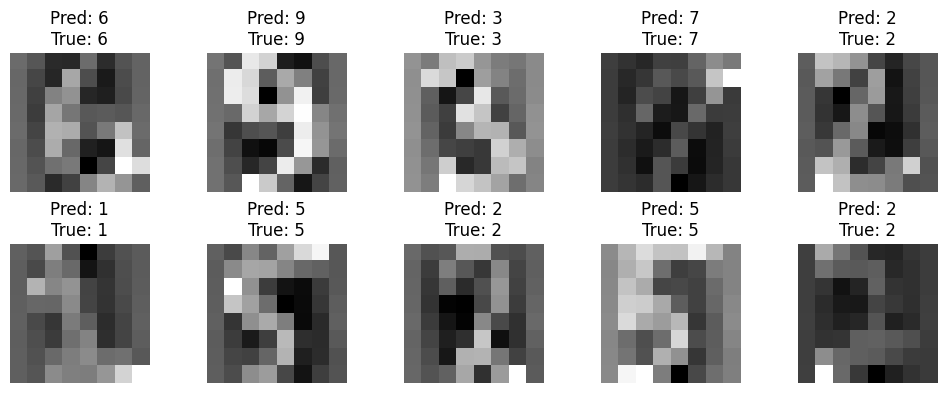

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize some test digits with predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
